In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('interstellar_reviews.csv')
df

,Name,Stars,Rewatch,Review
0,fortunately_eve,★★★★★,Watched,Nothing is like this
1,gremista_,★★★★,Watched,é sobre esse filme me fazer chorar no final to...
2,rafaaelaaap,★★★★½,Watched,Tendrá como 73838282881 agujeros en el guion p...
3,talyyice,★★★★★,Watched,pase d ver a matthew cmo un lobo d wall street...
4,_n1ck,★★★★★,Watched,m vine
...,...,...,...,...
3067,thvmj,★★★★★,Watched,quisiera borrarme la memoria para verla por pr...
3068,altstreak,★★★★★,Watched,cant wait to watch this again in imax this fal...
3069,valenccv,★★★★½,Watched,I think that we know who is his favorite child
3070,bolsademareo,★★★★★,Watched,call it a twink the way it cannot be topped


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     3072 non-null   object
 1   Stars    3072 non-null   object
 2   Rewatch  3072 non-null   object
 3   Review   3072 non-null   object
dtypes: object(4)
memory usage: 96.1+ KB


In [4]:
# Mengganti karakter setengah (½) dengan nilai desimal
def convert_stars(star_str):
    full_stars = star_str.count('★')
    half_star = 0.5 if '½' in star_str else 0
    return full_stars + half_star

# Mengaplikasikan fungsi ke kolom 'Stars'
df['Stars'] = df['Stars'].apply(convert_stars)

# Mengubah tipe data kolom 'Stars' menjadi float
df['Stars'] = df['Stars'].astype(float)

# Convert 'Rewatch' column to boolean
df['Rewatch'] = df['Rewatch'].map({'Rewatched': True, 'Watched': False})

# No need to explicitly convert 'Review' column to string (it's already text data)

# Check updated data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     3072 non-null   object 
 1   Stars    3072 non-null   float64
 2   Rewatch  3072 non-null   bool   
 3   Review   3072 non-null   object 
dtypes: bool(1), float64(1), object(2)
memory usage: 75.1+ KB


In [5]:
df

,Name,Stars,Rewatch,Review
0,fortunately_eve,5.0,False,Nothing is like this
1,gremista_,4.0,False,é sobre esse filme me fazer chorar no final to...
2,rafaaelaaap,4.5,False,Tendrá como 73838282881 agujeros en el guion p...
3,talyyice,5.0,False,pase d ver a matthew cmo un lobo d wall street...
4,_n1ck,5.0,False,m vine
...,...,...,...,...
3067,thvmj,5.0,False,quisiera borrarme la memoria para verla por pr...
3068,altstreak,5.0,False,cant wait to watch this again in imax this fal...
3069,valenccv,4.5,False,I think that we know who is his favorite child
3070,bolsademareo,5.0,False,call it a twink the way it cannot be topped


In [6]:
df['Rewatch'].unique()

array([False])

In [7]:
df['Stars'].unique()

array([5. , 4. , 4.5, 3. , 2. , 0. , 3.5, 1. , 1.5, 2.5, 0.5])

4.561197916666667

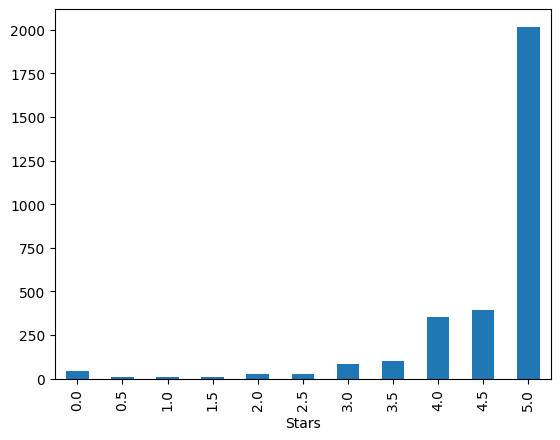

In [8]:
df.groupby('Stars').size().plot(kind='bar')
df['Stars'].mean()

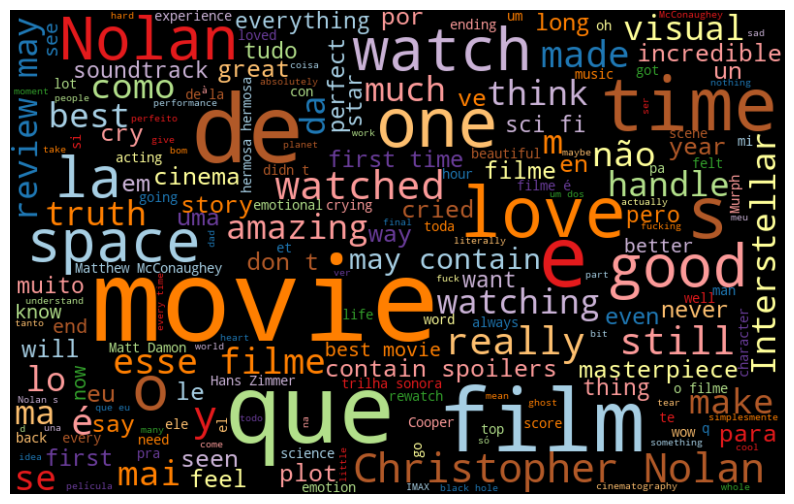

In [21]:
# Sentimen yang ada pada seluruh data train dapat dilihat dengan memahami kata yang umum dengan plot word cloud

def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, colormap='Paired', random_state=21, max_font_size=120).generate(words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

all_words = ' '.join([text for text in df['Review']])
wordCloud(all_words)

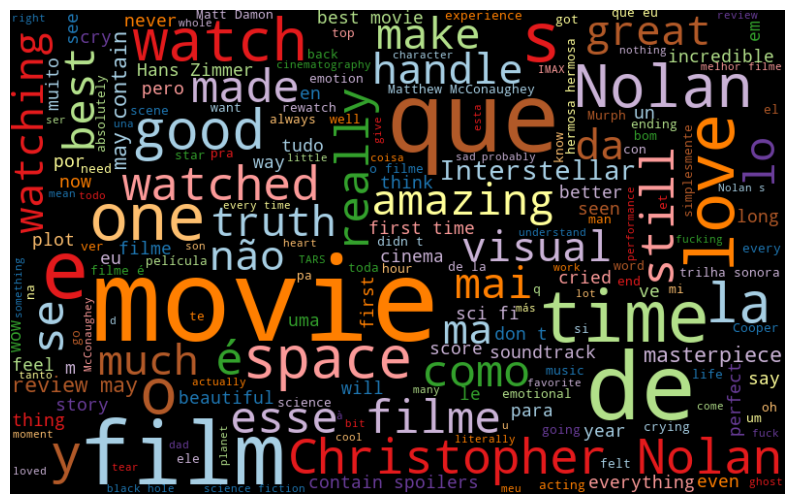

In [22]:
# Filter review dengan nilai bintang antara 0 dan 2.5
negative_reviews = df['Review'][(df['Stars'] >= 3.5) & (df['Stars'] <= 5)]

# Gabungkan teks review menjadi satu string
negative_words = ' '.join(negative_reviews)

# Buat WordCloud
wordCloud(negative_words)

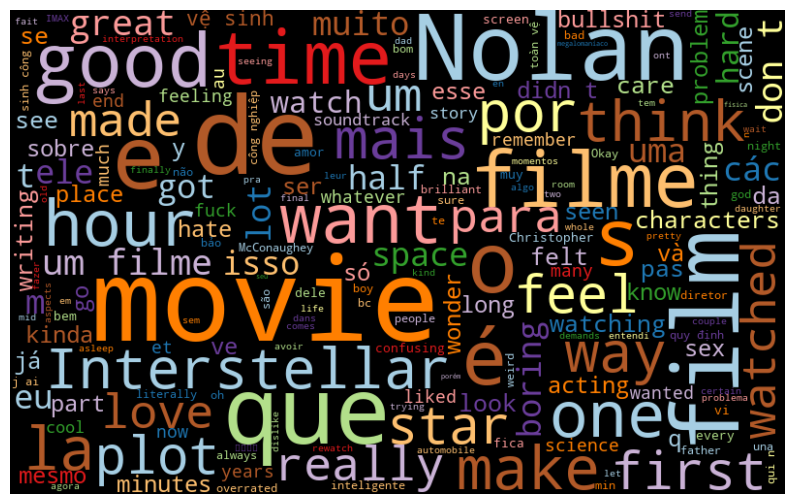

In [23]:
# Filter review dengan nilai bintang antara 0 dan 2.5
negative_reviews = df['Review'][(df['Stars'] >= 0) & (df['Stars'] <= 2.5)]

# Gabungkan teks review menjadi satu string
negative_words = ' '.join(negative_reviews)

# Buat WordCloud
wordCloud(negative_words)

In [30]:
# Fungsi untuk mengelompokkan nilai bintang
def categorize_stars(stars):
    if stars <= 2.5:
        return 'Dislike'
    elif 3 <= stars <= 3.5:
        return 'Neutral'
    elif stars > 3.5:
        return 'Like'

# Terapkan fungsi ke kolom 'Stars' untuk membuat kolom baru 'Category'
df['Category'] = df['Stars'].apply(categorize_stars)

# Simpan hasil ke DataFrame baru
df_rev = df.copy()

# Menghapus kolom yang tidak diperlukan
df_rev.drop(['Rewatch', 'Stars', 'Name'], axis=1, inplace=True)

# Menampilkan DataFrame baru
df_rev

,Review,Category
0,Nothing is like this,Like
1,é sobre esse filme me fazer chorar no final to...,Like
2,Tendrá como 73838282881 agujeros en el guion p...,Like
3,pase d ver a matthew cmo un lobo d wall street...,Like
4,m vine,Like
...,...,...
3067,quisiera borrarme la memoria para verla por pr...,Like
3068,cant wait to watch this again in imax this fal...,Like
3069,I think that we know who is his favorite child,Like
3070,call it a twink the way it cannot be topped,Like


# Split Dataset

In [44]:
df_rev.shape

(3072, 2)

In [45]:
# Membagi dataset menjadi training dan testing dengan proporsi 80:20
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_rev, test_size=0.2, random_state=2000)
train_df.shape


(2457, 2)

In [46]:
test_df.shape

(615, 2)

# Feature Engineering dengan TF-IDF

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
# Melakukan vektorisasi untuk mengekstrak fitur dengan TF-IDF
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(train_df['Review'])
test_vectors = vectorizer.transform(test_df['Review'])

In [52]:
from sklearn import svm
# melakukan klasifikasi dengan SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, train_df['Category'])
prediction_linear = classifier_linear.predict(test_vectors)

In [55]:
from sklearn.metrics import classification_report
# print metriks
target_names = ['positive', 'negative', 'netral']
print(classification_report(test_df['Category'], prediction_linear, target_names=target_names))

              precision    recall  f1-score   support

    positive       0.00      0.00      0.00        28
    negative       0.89      1.00      0.94       544
      netral       0.00      0.00      0.00        43

    accuracy                           0.88       615
   macro avg       0.30      0.33      0.31       615
weighted avg       0.78      0.88      0.83       615



c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [61]:
teks = """I bad"""
teks_vector = vectorizer.transform([teks]) # vectorizing
print(classifier_linear.predict(teks_vector))

['Like']
